In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table as Table
import matplotlib.pyplot as plt
from linetools.spectra import utils as ltsu
from linetools.spectra.xspectrum1d import XSpectrum1D
import astropy.units as u
from astropy import constants as const
from numpy import random as ran
from __future__ import print_function
from astropy.coordinates import SkyCoord
from dustmaps.bayestar import BayestarQuery
from astropy.cosmology import WMAP9 as cosmo
import pdb
%matplotlib inline

In [10]:
yeet = input("whats good?")

whats good?/home/jsm/PycharmProjects/tau_eff/fits/comp_test/


In [11]:
yeet

'/home/jsm/PycharmProjects/tau_eff/fits/comp_test/'

In [2]:
z_bin = [2.0,2.5]

path_16 = "/home/jsm/PycharmProjects/tau_eff/Spectra/2016/"

path_17 = "/home/jsm/PycharmProjects/tau_eff/Spectra/2017/"


spec_atr_16 = Table.read(path_16 + "spec_atr.txt", format = 'ascii')

spec_atr_17 = Table.read(path_17 + "spec_atr.txt", format = 'ascii')


In [3]:
#read in

spec_16 = []

z_16 = []

coord_16 = []

for entry in spec_atr_16: # from the CLAMATO 2016 survey

    if np.min(z_bin) < entry["zspec"] < np.max(z_bin):  # creating the bin size

        if entry["Conf"] < 10.0:  # excluding any QSOs

            temp = XSpectrum1D.from_file(path_16 + entry["Filename"])

            if temp.wvmin < (1216 * u.AA) * (1 + entry["zspec"]) < temp.wvmax:
                
                coord_16.append([entry["RA"],entry["Dec"]]) #coordinates in deg

                z_16.append(entry["zspec"])

                spec_16.append(XSpectrum1D.from_file(path_16 + entry["Filename"]))

In [4]:
spec_17 = []

z_17 = []

coord_17 = []

for entry in spec_atr_17:

    if np.min(z_bin) < entry["col5"] < np.max(z_bin):

        if entry["col4"] < 10.0:

            temp = XSpectrum1D.from_file(path_17 + entry["col1"])

            if temp.wvmin < (1120 * u.AA) * (1 + entry["col5"]) < temp.wvmax:
                
                coord_17.append([entry["col7"],entry["col8"]]) #coordinates in deg

                z_17.append(entry["col5"])

                spec_17.append(XSpectrum1D.from_file(path_17 + entry["col1"]))

/home/jsm/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [5]:
#array creation

spec = np.asarray(spec_16 + spec_17)

print("Number of spectra (Nspec) in the redshift bin", len(spec))

red = np.asarray(z_16 + z_17)

radec = np.asarray(coord_16 + coord_17)

Number of spectra (Nspec) in the redshift bin 265


In [20]:
spec[12].wavelength
    

<Quantity [ 3512.53069546, 3513.71087562, 3514.88843051,...,
            6060.33141333, 6061.54608196, 6062.76064843] Angstrom>

In [6]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from dustmaps.bayestar import BayestarQuery
from astropy.cosmology import WMAP9 as cosmo

Mpc = cosmo.comoving_distance(red)

bayestar = BayestarQuery()

coords = [SkyCoord(radec[i][0]*u.deg, radec[i][1]*u.deg, distance = Mpc[i], frame='fk5') for i in range(len(spec))]

ebv = [bayestar(i) for i in coords]

In [15]:
flux = [ccm_unred(spec[i].wavelength,spec[i].flux,ebv=ebv[i]) for i in range(len(spec))]

In [ ]:
#the ccm_unred is breaking down because some of the spectra range inside of mid-UV and call on the "ravel" function
#which for some reason is undefined. If i simply do not include the mid and far UV attenuation. 
#Ill be missing out on the bluest values of my spectra
#maybe I do the s/n cut first?

i = 1

ccm_unred(spec[i].wavelength,spec[i].flux,ebv=ebv[i])

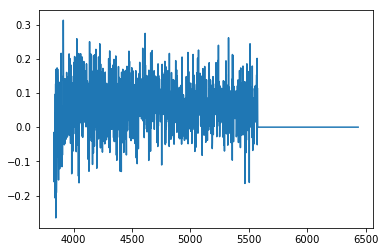

In [16]:
i=34

plt.plot(spec[i].wavelength,flux[i])
plt.show()

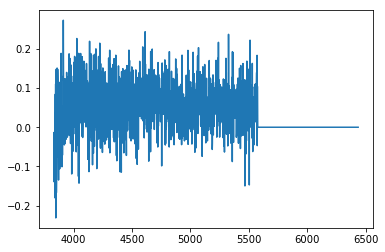

In [17]:
i=34

plt.plot(spec[i].wavelength,spec[i].flux)
plt.show()